In [1]:
# %pip install cartopy
# %pip install git+https://bitbucket.org/jsteven5/tasplot.git

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import os
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.colors as mcolors
from matplotlib.patches import FancyBboxPatch
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
import tasplot
from labellines import labelLines
import seaborn as sns
import numpy as np


plt.rcParams["pdf.fonttype"]=42
plt.rcParams["font.size"] =9
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

small_font=8


In [3]:
volcanodata = pd.read_excel("S3_MI_compilation_XH2O_revised.xlsx", sheet_name="TableS-8 XH2O_calculated",skiprows=[0])

SiO2_min = 30
SiO2_max = 57

vdatafilt = volcanodata[(volcanodata['SaturationP_bars_VESIcal'] != 0)&(volcanodata['CO2'] != 0)&(volcanodata['H2O'] != 0)&(volcanodata['SiO2'].between(SiO2_min, SiO2_max))&~(volcanodata['MgO']>16)]

vdatafilt.to_clipboard(excel=True,index=False)

In [4]:
vdatafilt2 = vdatafilt.sort_values(by=['Location type','Location','Volcano']).copy()

aggregated_df = pd.DataFrame()

grouped = vdatafilt2.groupby('Volcano')

# Iterate over columns
for col in vdatafilt2.columns:
    if pd.api.types.is_numeric_dtype(vdatafilt2[col]):
        # For numeric columns, calculate median only if there is more than one row in the group
        aggregated_df[col] = grouped[col].median() if len(grouped[col]) > 1 else grouped[col].first()
    else:
        # For string columns, preserve the first occurrence
        aggregated_df[col] = grouped[col].first()

aggregated_df = aggregated_df.reset_index(drop=True)
aggregated_df.head()

pd.DataFrame(aggregated_df.to_clipboard(excel=True,index=False))

""


## Plot Fig 4

### Fig 4 Top map panel

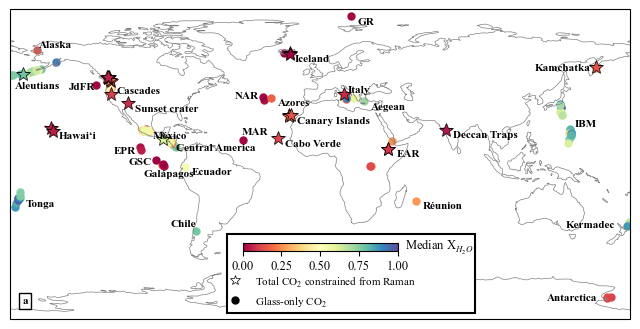

In [5]:
xh2o=aggregated_df.copy()
xh2o=xh2o[xh2o['SaturationP_bars_VESIcal']/10>20]
bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')

# Sample dataframe of volcanoes
data = {
    'Volcano': xh2o['Volcano'],
    'Latitude': xh2o['Latitude'],
    'Longitude': xh2o['Longitude'],
    'XH2O': xh2o['XH2O_fl_VESIcal'],
    'Raman_Homog': xh2o['Raman/Homog'],  # Assuming you have this column
    'Location': xh2o['Location']  # Assuming you have a column for location
}

df = pd.DataFrame(data)

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(color='grey',linewidth=0.5)

# Plot markers with NaN values in 'Raman_Homog' column as circles
for index, row in df[df['Raman_Homog'].isnull()].iterrows():
    ax.plot(row['Longitude'], row['Latitude'], 'o', markersize=5, transform=ccrs.PlateCarree(),
            color=plt.cm.Spectral(row['XH2O']),zorder=-1)

# Plot markers with non-NaN values in 'Raman_Homog' column as stars
for index, row in df.dropna(subset=['Raman_Homog']).iterrows():
    ax.plot(row['Longitude'], row['Latitude'], '*', markersize=10, transform=ccrs.PlateCarree(),
            color='none', markerfacecolor=plt.cm.Spectral(row['XH2O']), markeredgewidth=0.5, markeredgecolor='black',zorder=3)
    if row['Volcano']=='KLYUCHEVSKOY-Raman':
        kamcol=plt.cm.Spectral(row['XH2O'])

for location in df['Location'].unique():
    loc_df = df[df['Location'] == location]
    avg_lat = loc_df['Latitude'].mean()
    avg_lon = loc_df['Longitude'].mean()
    if location in ['Kamchatka','Kermadec','Antarctica']:
        ax.text(avg_lon - 36, avg_lat, location, transform=ccrs.PlateCarree(),
                fontsize=small_font, fontweight='bold', va='center', color='black')
    elif location == 'MAR':
        ax.text(avg_lon - 7, avg_lat-7, location, transform=ccrs.PlateCarree(),
                fontsize=small_font, fontweight='bold', va='center', color='black')
    elif location == 'NAR':
        ax.text(avg_lon - 16, avg_lat+1, location, transform=ccrs.PlateCarree(),
                fontsize=small_font, fontweight='bold', va='center', color='black')
    elif location == 'Galápagos':
        ax.text(avg_lon - 11, avg_lat-5, location, transform=ccrs.PlateCarree(),
                fontsize=small_font, fontweight='bold', va='center', color='black')
    elif location == 'Alaska':
        ax.text(avg_lon+1, avg_lat+3, location, transform=ccrs.PlateCarree(),
                fontsize=small_font, fontweight='bold', va='center', color='black')
    elif location == 'Aleutians':
        ax.text(avg_lon - 9, avg_lat-8, location, transform=ccrs.PlateCarree(),
                fontsize=small_font, fontweight='bold', va='center', color='black')
    elif location == 'EAR':
        ax.text(avg_lon +8, avg_lat, location, transform=ccrs.PlateCarree(),
                fontsize=small_font, fontweight='bold', va='center', color='black')
    elif location == 'IBM':
        ax.text(avg_lon +5, avg_lat, location, transform=ccrs.PlateCarree(),
                fontsize=small_font, fontweight='bold', va='center', color='black')
    elif location == 'Italy':
        ax.text(avg_lon +1, avg_lat+4, location, transform=ccrs.PlateCarree(),
                fontsize=small_font, fontweight='bold', va='center', color='black')
    elif location == 'Chile':
        ax.text(avg_lon -15, avg_lat+4, location, transform=ccrs.PlateCarree(),
                fontsize=small_font, fontweight='bold', va='center', color='black')
    elif location in ['GSC','EPR','JdFR']:
        ax.text(avg_lon - 16, avg_lat-1, location, transform=ccrs.PlateCarree(),
                fontsize=small_font, fontweight='bold', va='center', color='black')
    else:
        ax.text(avg_lon + 4, avg_lat-3, location, transform=ccrs.PlateCarree(),
                fontsize=small_font, fontweight='bold', va='center', color='black')

sm = plt.cm.ScalarMappable(cmap='Spectral')
sm.set_array([])
cbar_label = 'Median X$_{H_2O}$'
# Create inset axes for the colorbar and legend
cax = inset_axes(ax, width="50%", height="60%", loc='lower center', bbox_to_anchor=(0.25, 0.2, 0.5, 0.04), bbox_transform=ax.transAxes)
# Create colorbar
cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
cbar.ax.text(1.05, 0.5, cbar_label, va='center', ha='left', transform=cbar.ax.transAxes)
# Create legend
legend_handles = []
legend_labels = []

dummycircle = ax.plot([], [], 'o', markersize=5, color='k', label='Glass-only CO$_2$')
dummystar = ax.plot([], [], '*', markersize=7, color='white', markeredgewidth=0.5, markeredgecolor='k',
                    label='Total CO$_2$ constrained from Raman')

legend_handles.extend([dummystar[0], dummycircle[0]])
legend_labels.extend([dummystar[0].get_label(), dummycircle[0].get_label()])

# Draw bounding box around colorbar and legend
bbox = dict(boxstyle='square', facecolor='white', edgecolor='black')
ax.text(0.02,0.05, 'a', fontsize=small_font, fontweight='bold', bbox=bbox,transform=ax.transAxes)

# Create a FancyBboxPatch for the bounding box enclosing colorbar and legend
rect = FancyBboxPatch((0.20,-8), 1, 10, boxstyle="square,pad=0.3", linewidth=1.5, facecolor="white", edgecolor="black", transform=cax.transAxes,zorder=3)
ax.add_patch(rect)

# Add legend
ax.legend(legend_handles, legend_labels, loc='lower center', frameon=False,fontsize=small_font)

plt.show()

directory=os.path.join(os.getcwd(), 'Notebook_output')
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(os.path.join(os.getcwd(), 'Notebook_output', f'Fig4_map_panel.pdf'))

### Fig4 Violin panels

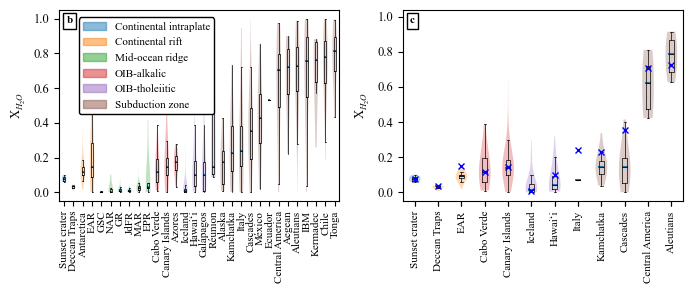

In [6]:
data_filtered_P_over20=vdatafilt2[vdatafilt2['SaturationP_bars_VESIcal']/10>20]
data_filtered_P_over20 = data_filtered_P_over20[
    (data_filtered_P_over20['XH2O_fl_VESIcal'].notna())
]
fig, axs = plt.subplots(1, 2, figsize=(7,3))
bbox=dict(boxstyle='square', facecolor='white', edgecolor='black')

# Define color dictionary
color_dict = {}

boxplot_data = []
labels = []
location_types = data_filtered_P_over20['Location type'].unique()

for i, loc_type in enumerate(location_types):
    loc_data = data_filtered_P_over20[data_filtered_P_over20['Location type'] == loc_type]
    loc_labels = loc_data.groupby('Location')['XH2O_fl_VESIcal'].median().sort_values().index
    labels.extend(loc_labels)
    boxplot_data.extend([loc_data[loc_data['Location'] == loc]['XH2O_fl_VESIcal'].values for loc in loc_labels])

    # Assign colors based on index (same as in the first panel)
    color_dict[loc_type] = plt.get_cmap('tab10')(i)

# Plotting the first panel
violins1 = axs[0].violinplot(boxplot_data, showmeans=False, showextrema=False, showmedians=True, bw_method=1)

for i, loc_type in enumerate(location_types):
    loc_indices = data_filtered_P_over20[data_filtered_P_over20['Location type'] == loc_type]['Location']
    violin_indices = [labels.index(loc) for loc in loc_indices]
    for violin_index in violin_indices:
        violins1['bodies'][violin_index].set_facecolor(color_dict[loc_type])  

boxes1=axs[0].boxplot(boxplot_data, labels=labels, widths=0.2, showfliers=False)
axs[0].set_xticklabels(labels, rotation=90)

for box in boxes1['boxes']:
    box.set_linewidth(0.5)  # Box edges

for whisker in boxes1['whiskers']:
    whisker.set_linewidth(0.5)  # Whiskers

for median in boxes1['medians']:
    median.set_linewidth(0.5)  # Median line

# Optionally adjust caps if needed
for cap in boxes1['caps']:
    cap.set_linewidth(0.5)  # Caps

## Plot violin color legend ##
legend_handles = []
legend_labels = []
for loc_type, color in color_dict.items():
    legend_handles.append(mpatches.Patch(color=color, alpha=0.5, label=loc_type))
    legend_labels.append(loc_type)

axs[0].legend(handles=legend_handles, labels=legend_labels, loc='upper left',bbox_to_anchor=(0.05, 0.99),framealpha=1, edgecolor='black',fontsize=small_font)

vdatafilt3=data_filtered_P_over20.copy()
vdatafilt3.dropna(subset=['Raman/Homog'], inplace=True)

# Plotting the second panel
boxplot_data = []
labels = []
location_types = vdatafilt3['Location type'].unique()

for loc_type in location_types:
    loc_data = vdatafilt3[vdatafilt3['Location type'] == loc_type]
    loc_labels = loc_data.groupby('Location')['XH2O_fl_VESIcal'].median().sort_values().index
    labels.extend(loc_labels)
    boxplot_data.extend([loc_data[loc_data['Location'] == loc]['XH2O_fl_VESIcal'].values for loc in loc_labels])

violins2 = axs[1].violinplot(boxplot_data, showmeans=False, showextrema=False, showmedians=True, bw_method=1)

for loc_type in location_types:
    loc_indices = vdatafilt3[vdatafilt3['Location type'] == loc_type]['Location']
    violin_indices = [labels.index(loc) for loc in loc_indices]
    for violin_index in violin_indices:
        violins2['bodies'][violin_index].set_facecolor(color_dict[loc_type])

boxes2=axs[1].boxplot(boxplot_data, labels=labels, widths=0.2, showfliers=False)
axs[1].set_xticklabels(labels, rotation=90)

for box in boxes2['boxes']:
    box.set_linewidth(0.5)  # Box edges

for whisker in boxes2['whiskers']:
    whisker.set_linewidth(0.5)  # Whiskers

for median in boxes2['medians']:
    median.set_linewidth(0.5)  # Median line

# Optionally adjust caps if needed
for cap in boxes2['caps']:
    cap.set_linewidth(0.5)  # Caps

# Add the plotting of medians
vdatafilt4 = data_filtered_P_over20.copy()
vdatafilt4 = vdatafilt4[vdatafilt4['Location'].isin(vdatafilt3['Location'].unique())]

boxplot_data = []
labels = []
location_types = vdatafilt4['Location type'].unique()

# Calculate and sort medians from vdatafilt3
median_order = vdatafilt3.groupby('Location')['XH2O_fl_VESIcal'].median().sort_values().index

for loc_type in location_types:
    loc_data = vdatafilt4[vdatafilt4['Location type'] == loc_type]
    # Use the median order from vdatafilt3 to sort labels and data
    loc_labels = [loc for loc in median_order if loc in loc_data['Location'].unique()]
    labels.extend(loc_labels)
    boxplot_data.extend([loc_data[loc_data['Location'] == loc]['XH2O_fl_VESIcal'].values for loc in loc_labels])

# Plotting
boxes3 = axs[1].boxplot(boxplot_data, labels=labels, widths=0.2, showfliers=False)

# Adjust boxplot appearance
for whisker in boxes3['whiskers']:
    whisker.set_visible(False)

for cap in boxes3['caps']:
    cap.set_visible(False)

for cap in boxes3['boxes']:
    cap.set_visible(False)

for median in boxes3['medians']:
    median.set_color('blue')
    x = np.mean(median.get_xdata())
    y = np.mean(median.get_ydata())
    median.set_marker('x')
    median.set_markersize(5)
    median.set_xdata([x])
    median.set_ydata([y])

for median in boxes1['medians']:
    median.set_color('k')
for median in boxes2['medians']:
    median.set_color('k')

axs[0].tick_params(axis='x', labelsize=8)  # Set x-axis tick label font size
axs[1].tick_params(axis='x', labelsize=8)  # Set x-axis tick label font size


pos=(0.025,0.93)

axs[0].text(pos[0], pos[1], 'b', transform=axs[0].transAxes, fontsize=small_font, fontweight='bold', bbox=bbox)
axs[1].text(pos[0], pos[1], 'c', transform=axs[1].transAxes, fontsize=small_font, fontweight='bold', bbox=bbox)

axs[0].set_ylabel('X$_{H_2O}$')
axs[1].set_ylabel('X$_{H_2O}$')
# Additional modifications
fig.tight_layout()

directory=os.path.join(os.getcwd(), 'Notebook_output')
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(os.path.join(os.getcwd(), 'Notebook_output', f'Fig4_violin_panels_XH2O.pdf'))
plt.show()

## Plot FIGURE 5: TAS for OIBs next to P-XH2O

### TAS plotting things

In [7]:
# Create DataFrame
Irvine_Baragar_1971_TAS_alk_subalk = pd.DataFrame([
    (45.3467312706644, 2.90479178360426),
    (46.08412131106158, 3.2478236783792322),
    (46.662298258824386, 3.4784357608967493),
    (47.50509069504223, 3.8123796122874456),
    (48.497238752868284, 4.170176595920335),
    (49.862775864714905, 4.635312674643091),
    (50.92960173334508, 4.987146375215432),
    (52.44982859614308, 5.51787856760422),
    (54.68482879092329, 6.316958497717669),
    (56.46642799153568, 6.943103219075225),
    (59.43220390632757, 7.804797621324433),
    (62.48332589060987, 8.654565457452545),
    (65.139722303499, 9.388049273899968),
    (66.942658021484, 9.888965050986013)
], columns=['SiO2 (wt%)', 'Total Alkali (wt%)'])

Miyashiro_1974_TAS_alk_subalk = pd.DataFrame([
    (38.48488773747841, 0.08565896431569797),
    (40.517846862406444, 1.0423381368274391),
    (41.30044617156016, 1.3951079063023606),
    (42.83865860679332, 2.0856985099598013),
    (43.6482440990213, 2.4294914802070977),
    (45.258419689119165, 3.1469861384459534),
    (46.85959988485895, 3.762797974568805),
    (46.05001439263097, 3.457884322916591),
    (48.43379389752447, 4.360670158584231),
    (49.33333333333333, 4.653605447034375),
    (51.393278641335634, 5.34709689104295),
    (50.736614853195164, 5.149822701629478),
    (53.16537132987911, 5.968860718505923),
    (52.38277202072539, 5.6998310198511675),
    (54.32577720207254, 6.381379741324379),
    (55.98992515831894, 6.889514924947575),
    (57.762017846862406, 7.403612947070323),
    (56.74553828439839, 7.1166792369748535),
    (58.661557282671275, 7.642715332850356),
    (59.570092112838225, 7.857890434516131),
    (60.262737478411054, 7.995344089252658),
    (61.10830454807139, 8.150715701777743),
    (62.06181635002879, 8.294105851912347),
    (63.02432354634427, 8.407587284302684),
    (63.941853770869315, 8.50911359740402),
    (64.9853195164076, 8.61061821618649),
    (65.90284974093265, 8.694200228397786),
    (66.90133851468049, 8.795712595151283),
    (67.764896373057, 8.90921107307787),
    (68.71840817501439, 9.028675488692423),
    (70.32858376511227, 9.189896819340126),
    (72.31656591824986, 9.386941668811303),
    (73.36902705814623, 9.470500437109532),
    (75.33002302820957, 9.658577784918304),
    (76.29253022452505, 9.77504993412365),
    (76.94919401266552, 9.846714017306857),
    (74.32253886010363, 9.548094817314),
    (75.83376511226253, 9.715314627127961),
    (71.30908175014393, 9.297393718912039),
    (69.42004893494531, 9.106313257534621),
    (55.03641335636154, 6.602570367692671),
    (47.36334196891192, 3.954117073453741),
    (44.196963154864704, 2.6925800346811606),
    (41.87615141047783, 1.652210378363801),
    (39.51036269430051, 0.5639970009773627)
], columns=['SiO2 (wt%)', 'Total Alkali (wt%)'])


Miya_Pf = np.poly1d(np.polyfit(Miyashiro_1974_TAS_alk_subalk['SiO2 (wt%)'],Miyashiro_1974_TAS_alk_subalk['Total Alkali (wt%)'], 8))
IB_Pf = np.poly1d(np.polyfit(Irvine_Baragar_1971_TAS_alk_subalk['SiO2 (wt%)'],Irvine_Baragar_1971_TAS_alk_subalk['Total Alkali (wt%)'],3))


### Now plot FIG 5

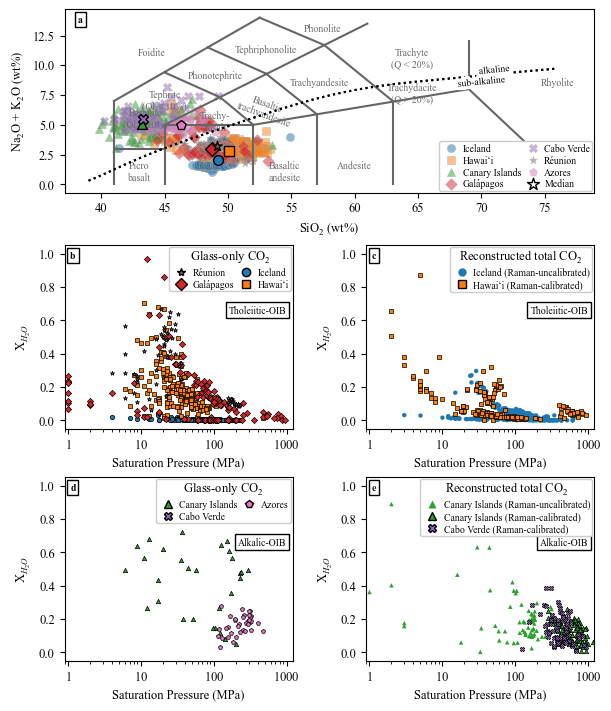

In [8]:
from matplotlib.ticker import ScalarFormatter

plotting_df=vdatafilt2.copy()#data_filtered_P_over20.copy()

is_oibthol = plotting_df['Location type'].str.contains('OIB-tholeiitic')
is_oib = plotting_df['Location type'].str.contains('OIB')
is_oibalk = plotting_df['Location type'].str.contains('OIB-alkalic')
is_intraplate = plotting_df['Location type'].str.contains('intraplate')
is_sz = plotting_df['Location type'] == 'Subduction zone'
is_rift = plotting_df['Location type'].str.contains('rift')
is_morb = plotting_df['Location type'].str.contains('ridge')

small_font=7

edgecolors='darkgrey'
alpha=0.5

legend_params = {
    'fontsize': 7,
    'ncols': 2,
    'loc': 'lower right',
    'labelspacing': 0.2,
    'columnspacing': 0.2,
    'borderpad': 0.2,
    'handletextpad': 0.2,
    'framealpha': 1,
    'borderaxespad': 0.2
}

legend_params_subplot = legend_params.copy()
legend_params_subplot['loc'] = 'upper right'
legend_params_subplot['fontsize'] = 7

# fig, axs = plt.subplots(3, 1, figsize=(7, 15)) 
mosaic_layout = [
    [0,0],         # Top panel spans across two columns
    [1,3],  # First row of the bottom grid
    [2,4]   # Second row of the bottom grid
]

# Create the figure and axes using the mosaic layout
fig, axs = plt.subplot_mosaic(mosaic_layout, figsize=(6, 7), constrained_layout=True)

sub_data = plotting_df[is_oib]
location_counts = sub_data['Location'].value_counts().sort_values(ascending=False)

num_colors_needed = len(location_counts)
new_palette = sns.color_palette("tab10", num_colors_needed)


# Assign colors based on sorted locations using the expanded palette
location_colors = {location: new_palette[i] for i, location in enumerate(location_counts.index)}

medians = sub_data.groupby('Location')[['SiO2', 'Na2O', 'K2O']].median()

markers = ['o', 's', '^', 'D', 'X', '*', 'p', 'h', 'v', '<', '>', 'd']

marker_dict = {location: markers[i % len(markers)] for i, location in enumerate(location_counts.index)}

# Plotting
for location in location_counts.index:
    loc = sub_data['Location'] == location

    axs[0].scatter(sub_data['SiO2'][loc], (sub_data['Na2O'][loc] + sub_data['K2O'][loc]), 
                    marker=marker_dict[location], color=location_colors[location], 
                    alpha=alpha, edgecolor=edgecolors,linewidths=0.5, label=location, zorder=-1)

    # Plot median for each location with the same color as the location
    axs[0].scatter(medians.loc[location, 'SiO2'], medians.loc[location, 'Na2O'] + medians.loc[location, 'K2O'],
                    color=location_colors[location], edgecolor='k', marker=marker_dict[location], s=50, zorder=3)

# Add a dummy scatter plot for legend
axs[0].scatter([], [], edgecolor='k',color='white', marker='*', s=80, label='Median')

axs[0].legend(**legend_params)
x_Miya = np.linspace(39, 76, 100)

ex=axs[0].plot(x_Miya,Miya_Pf(x_Miya),color='k',linestyle=':',label='alkaline') 
ex1=axs[0].plot(x_Miya,Miya_Pf(x_Miya),color='k',linestyle=':',label='sub-alkaline') 

labelLines(ex, zorder=3, xvals=[71],yoffsets=0.4, fontsize=small_font)
labelLines(ex1, zorder=3, xvals=[70],yoffsets=-0.5, fontsize=small_font,color='k')



axs[0].set_xlabel(r'SiO$_2$ (wt%)')  # Use LaTeX notation for subscript
axs[0].set_ylabel(r'Na$_2$O + K$_2$O (wt%)')
tasplot.add_LeMaitre_fields(axs[0],color=(0.4,0.4,0.4),fontsize=small_font)  # add TAS fields to plot


pos=(0.025,0.93)

axs[0].text(pos[0], pos[1], 'a', transform=axs[0].transAxes, fontsize=small_font, fontweight='bold', bbox=bbox)
axs[1].text(pos[0], pos[1], 'b', transform=axs[1].transAxes, fontsize=small_font, fontweight='bold', bbox=bbox)
axs[2].text(pos[0], pos[1], 'd', transform=axs[2].transAxes, fontsize=small_font, fontweight='bold', bbox=bbox)
axs[3].text(pos[0], pos[1], 'c', transform=axs[3].transAxes, fontsize=small_font, fontweight='bold', bbox=bbox)
axs[4].text(pos[0], pos[1], 'e', transform=axs[4].transAxes, fontsize=small_font, fontweight='bold', bbox=bbox)

plotting_df.loc[:, 'Raman/Homog'] = plotting_df['Raman/Homog'].fillna('')

siO2_min_all, siO2_max_all = plotting_df['SiO2'].min(), plotting_df['SiO2'].max()
satP_min_all, satP_max_all = plotting_df['SaturationP_bars_VESIcal'].min(), plotting_df['SaturationP_bars_VESIcal'].max()

kbar_or_MPa=10

# Set colormap
siO2_colormap = plt.get_cmap('cividis')

x_col, y_col = 'SaturationP_bars_VESIcal', 'XH2O_fl_VESIcal'

for i, location_type in enumerate([is_oibthol, is_oibalk]):
    loc_data = plotting_df[location_type]
    glass_only_data = loc_data[~loc_data['Raman/Homog'].str.contains('Raman')]
    raman_cal_data = loc_data[loc_data['Raman/Homog'].str.contains('Raman-cal')]
    raman_uncal_data = loc_data[loc_data['Raman/Homog'].str.contains('Raman-uncal')]

    # Filter locations based on presence in each subplot
    locations_in_subplot = set(glass_only_data['Location']) | set(raman_cal_data['Location']) | set(raman_uncal_data['Location'])

    # Plot only if the location is present in the current subplot
    for location in location_counts.index:
        if location in locations_in_subplot:
            loc = loc_data['Location'] == location

            axs[i+1].scatter(glass_only_data[x_col][loc]/kbar_or_MPa, glass_only_data[y_col][loc], 
                            marker=marker_dict[location], color=location_colors[location], 
                            alpha=1, edgecolor='k',label='_nolegend_',linewidths=0.5, s=10,zorder=0)
            axs[i+3].scatter(raman_uncal_data[x_col][loc]/kbar_or_MPa, raman_uncal_data[y_col][loc], 
                            marker=marker_dict[location], color=location_colors[location], 
                            alpha=1, edgecolor='none', label='_nolegend_', s=10,zorder=1)
            axs[i+3].scatter(raman_cal_data[x_col][loc]/kbar_or_MPa, raman_cal_data[y_col][loc], 
                            marker=marker_dict[location], linewidths=0.5,color=location_colors[location], 
                            alpha=1, edgecolor='k', label='_nolegend_', s=10,zorder=2)

    # Create legend handles and labels
    legend_handles1 = []
    legend_labels1 = []
    legend_handles3 = []
    legend_labels3 = []

    for location in locations_in_subplot:
        legend_handles1.append(plt.Line2D([0], [0], marker=marker_dict[location], markeredgecolor='k',color='w',linewidth=0.5, markerfacecolor=location_colors[location], markersize=6))
        legend_labels1.append(location)

        if i==0:
            if location in raman_uncal_data['Location'].to_list():
                legend_handles3.append(plt.Line2D([0], [0], marker=marker_dict[location], markeredgecolor='none',color='w', markerfacecolor=location_colors[location], markersize=6))
                legend_labels3.append(f'{location} (Raman-uncalibrated)')
            if location in raman_cal_data['Location'].to_list():
                legend_handles3.append(plt.Line2D([0], [0], marker=marker_dict[location], markeredgecolor='k',linewidth=0.5,color='w', markerfacecolor=location_colors[location], markersize=6))
                legend_labels3.append(f'{location} (Raman-calibrated)')
        if i==1:
            if location in raman_uncal_data['Location'].to_list():
                legend_handles3.append(plt.Line2D([0], [0], marker=marker_dict[location], markeredgecolor='none',color='w', markerfacecolor=location_colors[location], markersize=6))
                legend_labels3.append(f'{location} (Raman-uncalibrated)')
            if location in raman_cal_data['Location'].to_list():
                legend_handles3.append(plt.Line2D([0], [0], marker=marker_dict[location], markeredgecolor='k',linewidth=0.5,color='w', markerfacecolor=location_colors[location], markersize=6))
                legend_labels3.append(f'{location} (Raman-calibrated)')
            
    # Add legend for current subplot
    axs[i+1].legend(legend_handles1, legend_labels1, **legend_params_subplot,title='Glass-only CO$_2$')


    legend_params_subplot34=legend_params_subplot.copy()
    legend_params_subplot34['ncols'] = 1
    axs[i+3].legend(legend_handles3, legend_labels3, **legend_params_subplot34,title='Reconstructed total CO$_2$')

pos=(0.66,0.63)
axs[1].text(pos[0]+0.06, pos[1], 'Tholeiitic-OIB', transform=axs[1].transAxes, fontsize=small_font, fontweight='regular',bbox=bbox)
axs[2].text(pos[0]+0.1, pos[1], 'Alkalic-OIB', transform=axs[2].transAxes, fontsize=small_font, fontweight='regular',bbox=bbox)
axs[3].text(pos[0]+0.06, pos[1], 'Tholeiitic-OIB', transform=axs[3].transAxes, fontsize=small_font, fontweight='regular',bbox=bbox)
axs[4].text(pos[0]+0.1, pos[1], 'Alkalic-OIB', transform=axs[4].transAxes, fontsize=small_font, fontweight='regular',bbox=bbox)

for i in [1,2,3,4]:
    axs[i].set_xlabel("Saturation Pressure (MPa)")
    axs[i].set_ylabel("X$_{H_2O}$")
    # axs[i].set_xlim([-300/kbar_or_MPa,12000/kbar_or_MPa])
    axs[i].set_ylim([-0.05,1.05])
    axs[i].set_xscale("log")
    axs[i].set_xlim([0.9,1200])
    axs[i].xaxis.set_major_formatter(ScalarFormatter(useMathText=True))


plt.show()

directory=os.path.join(os.getcwd(), 'Notebook_output')
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(os.path.join(os.getcwd(), 'Notebook_output', f'Fig5_AlkvsThol.pdf'))
fig.savefig(os.path.join(os.getcwd(), 'Notebook_output', f'Fig5_AlkvsThol.png'),dpi=300)

## Supplement Figs, first S9

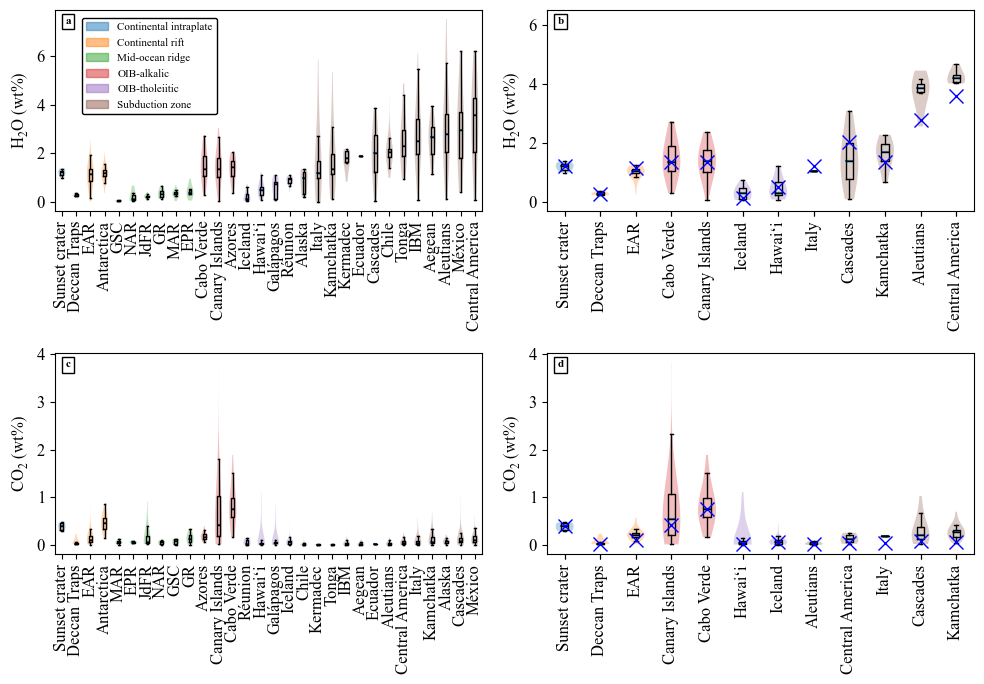

In [18]:
plt.rcParams["font.size"] = 12
small_font=8

fig, axs = plt.subplots(2, 2, figsize=(10, 7))

# Define color dictionary
color_dict = {}

boxplot_data = []
labels = []
location_types = data_filtered_P_over20['Location type'].unique()

for i, loc_type in enumerate(location_types):
    loc_data = data_filtered_P_over20[data_filtered_P_over20['Location type'] == loc_type]
    loc_labels = loc_data.groupby('Location')['H2O'].median().sort_values().index
    labels.extend(loc_labels)
    boxplot_data.extend([loc_data[loc_data['Location'] == loc]['H2O'].values for loc in loc_labels])

    # Assign colors based on index (same as in the first panel)
    color_dict[loc_type] = plt.get_cmap('tab10')(i)

# Plotting the first panel
violins1 = axs[0,0].violinplot(boxplot_data, showmeans=False, showextrema=False, showmedians=True, bw_method=1)

for i, loc_type in enumerate(location_types):
    loc_indices = data_filtered_P_over20[data_filtered_P_over20['Location type'] == loc_type]['Location']
    violin_indices = [labels.index(loc) for loc in loc_indices]
    for violin_index in violin_indices:
        violins1['bodies'][violin_index].set_facecolor(color_dict[loc_type])  

boxes1=axs[0,0].boxplot(boxplot_data, labels=labels, widths=0.2, showfliers=False)
axs[0,0].set_xticklabels(labels, rotation=90)

## Plot violin color legend ##
legend_handles = []
legend_labels = []
for loc_type, color in color_dict.items():
    legend_handles.append(mpatches.Patch(color=color, alpha=0.5, label=loc_type))
    legend_labels.append(loc_type)

axs[0,0].legend(handles=legend_handles, labels=legend_labels, loc='upper left',bbox_to_anchor=(0.05, 0.99),framealpha=1, edgecolor='black',fontsize=small_font)

############### Plotting the second panel with the Raman only ###################
vdatafilt3=data_filtered_P_over20.copy()
vdatafilt3.dropna(subset=['Raman/Homog'], inplace=True)

boxplot_data = []
labels = []
location_types = vdatafilt3['Location type'].unique()

for loc_type in location_types:
    loc_data = vdatafilt3[vdatafilt3['Location type'] == loc_type]
    loc_labels = loc_data.groupby('Location')['H2O'].median().sort_values().index
    labels.extend(loc_labels)
    boxplot_data.extend([loc_data[loc_data['Location'] == loc]['H2O'].values for loc in loc_labels])

violins2 = axs[0,1].violinplot(boxplot_data, showmeans=False, showextrema=False, showmedians=True, bw_method=1)

for loc_type in location_types:
    loc_indices = vdatafilt3[vdatafilt3['Location type'] == loc_type]['Location']
    violin_indices = [labels.index(loc) for loc in loc_indices]
    for violin_index in violin_indices:
        violins2['bodies'][violin_index].set_facecolor(color_dict[loc_type])

boxes2=axs[0,1].boxplot(boxplot_data, labels=labels, widths=0.2, showfliers=False)
axs[0,1].set_xticklabels(labels, rotation=90)

# Add the plotting of medians
vdatafilt4 = data_filtered_P_over20.copy()
vdatafilt4 = vdatafilt4[vdatafilt4['Location'].isin(vdatafilt3['Location'].unique())]

boxplot_data = []
labels = []
location_types = vdatafilt4['Location type'].unique()

# Calculate and sort medians from vdatafilt3
median_order = vdatafilt3.groupby('Location')['H2O'].median().sort_values().index

for loc_type in location_types:
    loc_data = vdatafilt4[vdatafilt4['Location type'] == loc_type]
    # Use the median order from vdatafilt3 to sort labels and data
    loc_labels = [loc for loc in median_order if loc in loc_data['Location'].unique()]
    labels.extend(loc_labels)
    boxplot_data.extend([loc_data[loc_data['Location'] == loc]['H2O'].values for loc in loc_labels])

# Plotting
boxes3 = axs[0,1].boxplot(boxplot_data, labels=labels, widths=0.2, showfliers=False)

# Adjust boxplot appearance
for whisker in boxes3['whiskers']:
    whisker.set_visible(False)

for cap in boxes3['caps']:
    cap.set_visible(False)

for cap in boxes3['boxes']:
    cap.set_visible(False)

for median in boxes3['medians']:
    median.set_color('blue')
    x = np.mean(median.get_xdata())
    y = np.mean(median.get_ydata())
    median.set_marker('x')
    median.set_markersize(10)
    median.set_xdata([x])
    median.set_ydata([y])

for median in boxes1['medians']:
    median.set_color('k')
for median in boxes2['medians']:
    median.set_color('k')

##################### CO2 PANELS ###############################

# Define color dictionary
color_dict = {}

boxplot_data = []
labels = []
location_types = data_filtered_P_over20['Location type'].unique()

for i, loc_type in enumerate(location_types):
    loc_data = data_filtered_P_over20[data_filtered_P_over20['Location type'] == loc_type]
    loc_labels = loc_data.groupby('Location')['CO2'].median().sort_values().index
    labels.extend(loc_labels)
    boxplot_data.extend([loc_data[loc_data['Location'] == loc]['CO2'].values for loc in loc_labels])

    # Assign colors based on index (same as in the first panel)
    color_dict[loc_type] = plt.get_cmap('tab10')(i)

# Plotting the first panel
violins1 = axs[1,0].violinplot(boxplot_data, showmeans=False, showextrema=False, showmedians=True, bw_method=1)

for i, loc_type in enumerate(location_types):
    loc_indices = data_filtered_P_over20[data_filtered_P_over20['Location type'] == loc_type]['Location']
    violin_indices = [labels.index(loc) for loc in loc_indices]
    for violin_index in violin_indices:
        violins1['bodies'][violin_index].set_facecolor(color_dict[loc_type])  

boxes1=axs[1,0].boxplot(boxplot_data, labels=labels, widths=0.2, showfliers=False)
axs[1,0].set_xticklabels(labels, rotation=90)


vdatafilt3=data_filtered_P_over20.copy()
vdatafilt3.dropna(subset=['Raman/Homog'], inplace=True)

# Plotting the second panel
boxplot_data = []
labels = []
location_types = vdatafilt3['Location type'].unique()

for loc_type in location_types:
    loc_data = vdatafilt3[vdatafilt3['Location type'] == loc_type]
    loc_labels = loc_data.groupby('Location')['CO2'].median().sort_values().index
    labels.extend(loc_labels)
    boxplot_data.extend([loc_data[loc_data['Location'] == loc]['CO2'].values for loc in loc_labels])

violins2 = axs[1,1].violinplot(boxplot_data, showmeans=False, showextrema=False, showmedians=True, bw_method=1)

for loc_type in location_types:
    loc_indices = vdatafilt3[vdatafilt3['Location type'] == loc_type]['Location']
    violin_indices = [labels.index(loc) for loc in loc_indices]
    for violin_index in violin_indices:
        violins2['bodies'][violin_index].set_facecolor(color_dict[loc_type])

boxes2=axs[1,1].boxplot(boxplot_data, labels=labels, widths=0.2, showfliers=False)
axs[1,1].set_xticklabels(labels, rotation=90)

# Add the plotting of medians
vdatafilt4 = data_filtered_P_over20.copy()
vdatafilt4 = vdatafilt4[vdatafilt4['Location'].isin(vdatafilt3['Location'].unique())]

boxplot_data = []
labels = []
location_types = vdatafilt4['Location type'].unique()

# Calculate and sort medians from vdatafilt3
median_order = vdatafilt3.groupby('Location')['CO2'].median().sort_values().index

for loc_type in location_types:
    loc_data = vdatafilt4[vdatafilt4['Location type'] == loc_type]
    # Use the median order from vdatafilt3 to sort labels and data
    loc_labels = [loc for loc in median_order if loc in loc_data['Location'].unique()]
    labels.extend(loc_labels)
    boxplot_data.extend([loc_data[loc_data['Location'] == loc]['CO2'].values for loc in loc_labels])

# Plotting
boxes3 = axs[1,1].boxplot(boxplot_data, labels=labels, widths=0.2, showfliers=False)

# Adjust boxplot appearance
for whisker in boxes3['whiskers']:
    whisker.set_visible(False)

for cap in boxes3['caps']:
    cap.set_visible(False)

for cap in boxes3['boxes']:
    cap.set_visible(False)

for median in boxes3['medians']:
    median.set_color('blue')
    x = np.mean(median.get_xdata())
    y = np.mean(median.get_ydata())
    median.set_marker('x')
    median.set_markersize(10)
    median.set_xdata([x])
    median.set_ydata([y])

for median in boxes1['medians']:
    median.set_color('k')
for median in boxes2['medians']:
    median.set_color('k')



pos=(0.025,0.93)

axs[0,0].text(pos[0], pos[1], 'a', transform=axs[0,0].transAxes, fontsize=small_font, fontweight='bold', bbox=bbox)
axs[0,1].text(pos[0], pos[1], 'b', transform=axs[0,1].transAxes, fontsize=small_font, fontweight='bold', bbox=bbox)

axs[1,0].text(pos[0], pos[1], 'c', transform=axs[1,0].transAxes, fontsize=small_font, fontweight='bold', bbox=bbox)
axs[1,1].text(pos[0], pos[1], 'd', transform=axs[1,1].transAxes, fontsize=small_font, fontweight='bold', bbox=bbox)


axs[0,0].set_ylabel('H$_2$O (wt%)')
axs[0,1].set_ylabel('H$_2$O (wt%)')

axs[1,0].set_ylabel('CO$_2$ (wt%)')
axs[1,1].set_ylabel('CO$_2$ (wt%)')


# Additional modifications
fig.tight_layout()

directory=os.path.join(os.getcwd(), 'Notebook_output')
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(os.path.join(os.getcwd(), 'Notebook_output', "FigS9_violin_panels_H2Owt%.pdf"))
fig.savefig(os.path.join(os.getcwd(), 'Notebook_output', "FigS9_violin_panels_H2Owt%.png"),dpi=300)

plt.show()


## Plot supplement Fig S7 TAS plots 

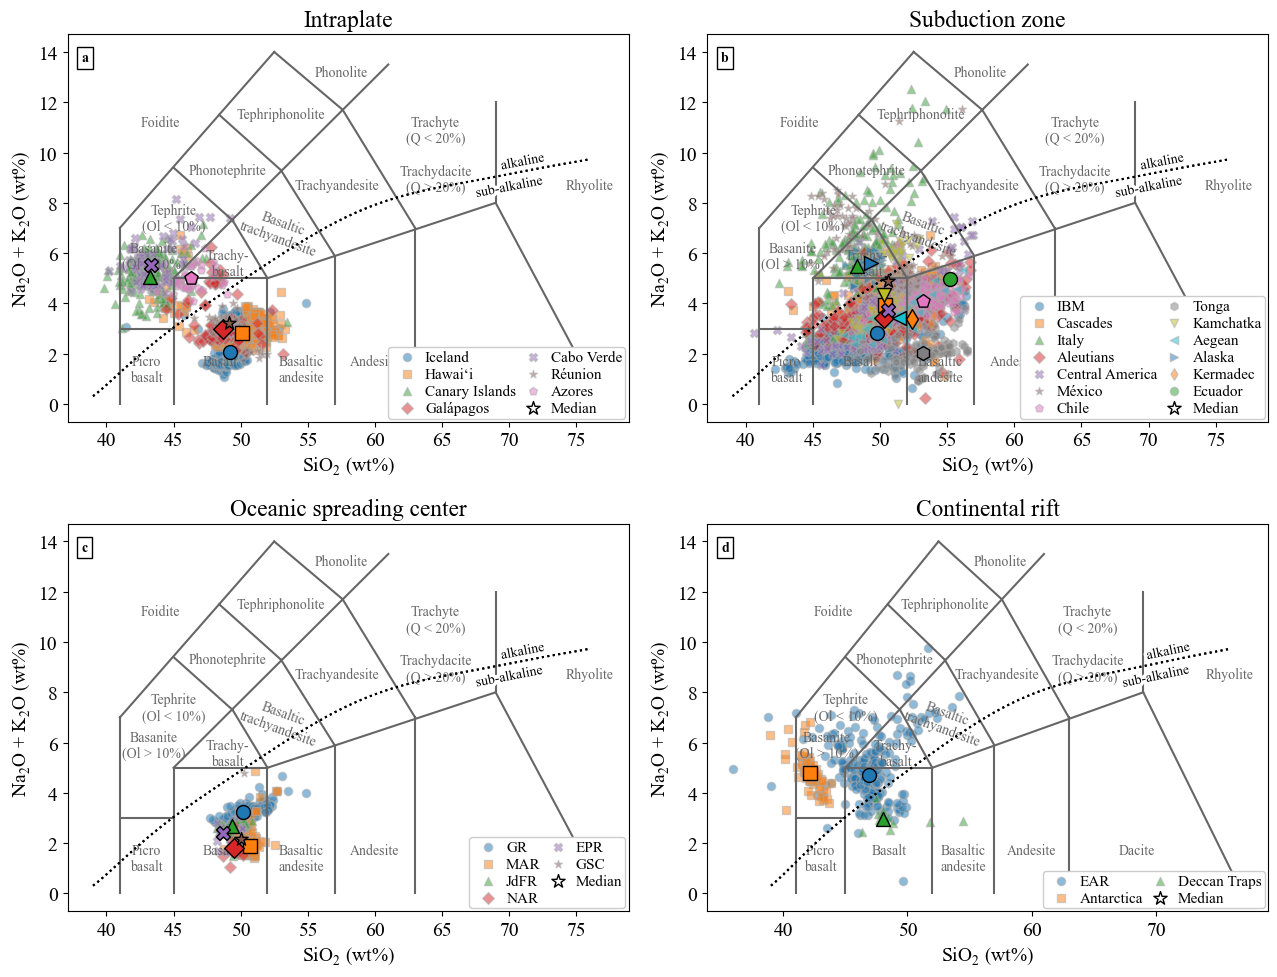

In [21]:
is_oibthol = vdatafilt2['Location type'].str.contains('OIB-tholeiitic')
is_oib = vdatafilt2['Location type'].str.contains('OIB')
is_oibalk = vdatafilt2['Location type'].str.contains('OIB-alkalic')
is_intraplate = vdatafilt2['Location type'].str.contains('intraplate')
is_sz = vdatafilt2['Location type'] == 'Subduction zone'
is_rift = vdatafilt2['Location type'].str.contains('rift')
is_morb = vdatafilt2['Location type'].str.contains('ridge')

plt.rcParams["font.size"] = 14
small_font=10

edgecolors='darkgrey'
alpha=0.5

legend_params = {
    'fontsize': 11,
    'ncols': 2,
    'loc': 'lower right',
    'labelspacing': 0.2,
    'columnspacing': 0.1,
    'borderpad': 0.2,
    'handletextpad': 0.2,
    'framealpha': 1,
    'borderaxespad': 0.2
}

fig, axs = plt.subplots(2, 2, figsize=(13, 10)) 


sub_data = vdatafilt2[is_oib]
location_counts = sub_data['Location'].value_counts().sort_values(ascending=False)

num_colors_needed = len(location_counts)
new_palette = sns.color_palette("tab10", num_colors_needed)



# Assign colors based on sorted locations using the expanded palette
location_colors = {location: new_palette[i] for i, location in enumerate(location_counts.index)}

medians = sub_data.groupby('Location')[['SiO2', 'Na2O', 'K2O']].median()

markers = ['o', 's', '^', 'D', 'X', '*', 'p', 'h', 'v', '<', '>', 'd']

marker_dict = {location: markers[i % len(markers)] for i, location in enumerate(location_counts.index)}

# Plotting
for location in location_counts.index:
    loc = sub_data['Location'] == location

    axs[0,0].scatter(sub_data['SiO2'][loc], (sub_data['Na2O'][loc] + sub_data['K2O'][loc]), 
                    marker=marker_dict[location], color=location_colors[location], 
                    alpha=alpha, edgecolor=edgecolors, label=location, zorder=-1)

    # Plot median for each location with the same color as the location
    axs[0,0].scatter(medians.loc[location, 'SiO2'], medians.loc[location, 'Na2O'] + medians.loc[location, 'K2O'],
                    color=location_colors[location], edgecolor='k', marker=marker_dict[location], s=100, zorder=3)

# Add a dummy scatter plot for legend
axs[0,0].scatter([], [], edgecolor='k',color='white', marker='*', s=100, label='Median')

axs[0,0].legend(**legend_params)
x_Miya = np.linspace(39, 76, 100)

ex=axs[0,0].plot(x_Miya,Miya_Pf(x_Miya),color='k',linestyle=':',label='alkaline') 
ex1=axs[0,0].plot(x_Miya,Miya_Pf(x_Miya),color='k',linestyle=':',label='sub-alkaline') 

labelLines(ex, zorder=3, xvals=[71],yoffsets=0.4, fontsize=small_font)
labelLines(ex1, zorder=3, xvals=[70],yoffsets=-0.5, fontsize=small_font,color='k')


############################################
sub_data2 = vdatafilt2[is_sz]
location_counts = sub_data2['Location'].value_counts().sort_values(ascending=False)

num_colors_needed = len(location_counts)
new_palette = sns.color_palette("tab10", num_colors_needed)

# Assign colors based on sorted locations using the expanded palette
location_colors = {location: new_palette[i] for i, location in enumerate(location_counts.index)}
medians = sub_data2.groupby('Location')[['SiO2', 'Na2O', 'K2O']].median()

marker_dict = {location: markers[i % len(markers)] for i, location in enumerate(location_counts.index)}

for location in location_counts.index:
    loc = sub_data2['Location'] == location

    axs[0,1].scatter(sub_data2['SiO2'][loc], (sub_data2['Na2O'][loc] + sub_data2['K2O'][loc]), 
                    marker=marker_dict[location], color=location_colors[location], alpha=alpha, edgecolor=edgecolors, label=location, zorder=-1)

    # Plot median for each location with the same color as the location
    axs[0,1].scatter(medians.loc[location, 'SiO2'], medians.loc[location, 'Na2O'] + medians.loc[location, 'K2O'],
                    color=location_colors[location], edgecolor='k', marker=marker_dict[location], s=100, zorder=3)

# Add a dummy scatter plot for legend
axs[0,1].scatter([], [], edgecolor='k',color='white', marker='*', s=100, label='Median')

axs[0,1].legend(**legend_params)
x_Miya = np.linspace(39, 76, 100)

ex=axs[0,1].plot(x_Miya,Miya_Pf(x_Miya),color='k',linestyle=':',label='alkaline') 
ex1=axs[0,1].plot(x_Miya,Miya_Pf(x_Miya),color='k',linestyle=':',label='sub-alkaline') 

labelLines(ex, zorder=3, xvals=[71],yoffsets=0.4, fontsize=small_font)
labelLines(ex1, zorder=3, xvals=[70],yoffsets=-0.5, fontsize=small_font,color='k')



######################################



sub_data = vdatafilt2[is_morb]
location_counts = sub_data['Location'].value_counts().sort_values(ascending=False)

num_colors_needed = len(location_counts)
new_palette = sns.color_palette("tab10", num_colors_needed)

# Assign colors based on sorted locations using the expanded palette
location_colors = {location: new_palette[i] for i, location in enumerate(location_counts.index)}
medians = sub_data.groupby('Location')[['SiO2', 'Na2O', 'K2O']].median()


marker_dict = {location: markers[i % len(markers)] for i, location in enumerate(location_counts.index)}

for location in location_counts.index:
    loc = sub_data['Location'] == location

    axs[1,0].scatter(sub_data['SiO2'][loc], (sub_data['Na2O'][loc] + sub_data['K2O'][loc]), 
                    marker=marker_dict[location], color=location_colors[location], alpha=alpha, edgecolor=edgecolors, label=location, zorder=-1)

    # Plot median for each location with the same color as the location
    axs[1,0].scatter(medians.loc[location, 'SiO2'], medians.loc[location, 'Na2O'] + medians.loc[location, 'K2O'],
                    color=location_colors[location], edgecolor='k', marker=marker_dict[location], s=100, zorder=3)

# Add a dummy scatter plot for legend
axs[1,0].scatter([], [], edgecolor='k',color='white', marker='*', s=100, label='Median')

legend3=axs[1,0].legend(**legend_params)

x_Miya = np.linspace(39, 76, 100)

ex=axs[1,0].plot(x_Miya,Miya_Pf(x_Miya),color='k',linestyle=':',label='alkaline') 
ex1=axs[1,0].plot(x_Miya,Miya_Pf(x_Miya),color='k',linestyle=':',label='sub-alkaline') 

labelLines(ex, zorder=3, xvals=[71],yoffsets=0.4, fontsize=small_font)
labelLines(ex1, zorder=3, xvals=[70],yoffsets=-0.5, fontsize=small_font,color='k')


#######################################

sub_data = vdatafilt2[is_rift]
location_counts = sub_data['Location'].value_counts().sort_values(ascending=False)

num_colors_needed = len(location_counts)
new_palette = sns.color_palette("tab10", num_colors_needed)

# Assign colors based on sorted locations using the expanded palette
location_colors = {location: new_palette[i] for i, location in enumerate(location_counts.index)}

medians = sub_data.groupby('Location')[['SiO2', 'Na2O', 'K2O']].median()

marker_dict = {location: markers[i % len(markers)] for i, location in enumerate(location_counts.index)}

for location in location_counts.index:
    loc = sub_data['Location'] == location

    axs[1,1].scatter(sub_data['SiO2'][loc], (sub_data['Na2O'][loc] + sub_data['K2O'][loc]), 
                    marker=marker_dict[location], color=location_colors[location], alpha=alpha, edgecolor=edgecolors, label=location, zorder=-1)

    # Plot median for each location with the same color as the location
    axs[1,1].scatter(medians.loc[location, 'SiO2'], medians.loc[location, 'Na2O'] + medians.loc[location, 'K2O'],
                    color=location_colors[location], edgecolor='k', marker=marker_dict[location], s=100, zorder=3)

# Add a dummy scatter plot for legend
axs[1,1].scatter([], [], edgecolor='k',color='white', marker='*', s=100, label='Median')

axs[1,1].legend(**legend_params)
x_Miya = np.linspace(39, 76, 100)

ex=axs[1,1].plot(x_Miya,Miya_Pf(x_Miya),color='k',linestyle=':',label='alkaline') 
ex1=axs[1,1].plot(x_Miya,Miya_Pf(x_Miya),color='k',linestyle=':',label='sub-alkaline') 

labelLines(ex, zorder=3, xvals=[71],yoffsets=0.4, fontsize=small_font)
labelLines(ex1, zorder=3, xvals=[70],yoffsets=-0.5, fontsize=small_font,color='k')


#############################################
for ax in axs.flat:
    ax.set_xlabel(r'SiO$_2$ (wt%)')  # Use LaTeX notation for subscript
    ax.set_ylabel(r'Na$_2$O + K$_2$O (wt%)')
    tasplot.add_LeMaitre_fields(ax,color=(0.4,0.4,0.4),fontsize=small_font)  # add TAS fields to plot



axs[0,0].set_title("Intraplate")
axs[0,1].set_title("Subduction zone")
axs[1,0].set_title("Oceanic spreading center")
axs[1,1].set_title("Continental rift")


pos=(0.025,0.93)

axs[0,0].text(pos[0], pos[1], 'a', transform=axs[0,0].transAxes, fontsize=small_font, fontweight='bold', bbox=bbox)
axs[0,1].text(pos[0], pos[1], 'b', transform=axs[0,1].transAxes, fontsize=small_font, fontweight='bold', bbox=bbox)
axs[1,0].text(pos[0], pos[1], 'c', transform=axs[1,0].transAxes, fontsize=small_font, fontweight='bold', bbox=bbox)
axs[1,1].text(pos[0], pos[1], 'd', transform=axs[1,1].transAxes, fontsize=small_font, fontweight='bold', bbox=bbox)




plt.tight_layout()
plt.show()


directory=os.path.join(os.getcwd(), 'Notebook_output')
if not os.path.exists(directory):
    os.makedirs(directory)

fig.savefig(os.path.join(os.getcwd(), 'Notebook_output', "FigS7_TASplot_all.pdf"))
fig.savefig(os.path.join(os.getcwd(), 'Notebook_output', "FigS7_TASplot_all.png"),dpi=300)
